QUADRATIC EQUATION CONDITIONAL WORKFLOW

In [1]:
from langgraph.graph import StateGraph, END, START
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from tqdm import tqdm
from typing import TypedDict, Annotated, Literal

In [2]:
load_dotenv()

True

In [3]:
llm = ChatGoogleGenerativeAI(
    model='gemini-2.0-flash'
)

In [20]:
class QuadraticState(TypedDict):

    a : int
    b : int
    c : int

    discriminant : float
    equation : str
    result : str


In [30]:
def create_equation(state: QuadraticState) -> str:
    equation = f"{state['a']}*x2 + {state['b']}*x + {state['c']})"
    return {'equation': equation}


def calculate_discriminant(state: QuadraticState) -> int:
    discriminant = (state['b']**2) - (4 * state['a'] * state['c'])
    return {'discriminant': discriminant}


def calculate_real_roots(state: QuadraticState) -> dict:
    root1 = (-state['b'] + state['discriminant'] ** 0.5) / (2 * state['a'])
    root2 = (-state['b'] - state['discriminant'] ** 0.5) / (2 * state['a'])

    result = f"The roots are {root1} and {root2}"

    return {'result': result}


def calculate_repeated_roots(state: QuadraticState) -> dict:
    root = -state['b'] / (2 * state['a'])

    result = f"The repeated root is {root}"

    return {'result': result}


def no_real_roots(state: QuadraticState) -> dict:
    result = "No real roots"

    return {'result': result}


def check_condition(state: QuadraticState) -> Literal['calculate_real_roots', 'calculate_repeated_roots', 'no_real_roots']:
    discriminant = state['discriminant']

    if discriminant > 0:
        return 'calculate_real_roots'
    elif discriminant == 0:
        return 'calculate_repeated_roots'
    else:
        return 'no_real_roots'

In [31]:
graph = StateGraph(QuadraticState)

graph.add_node('create_equation', create_equation)
graph.add_node('calculate_discriminant', calculate_discriminant)
graph.add_node('calculate_real_roots', calculate_real_roots)
graph.add_node('calculate_repeated_roots', calculate_repeated_roots)
graph.add_node('no_real_roots', no_real_roots)

graph.add_edge(START, 'create_equation')
graph.add_edge('create_equation', 'calculate_discriminant')

graph.add_conditional_edges('calculate_discriminant', check_condition)
graph.add_edge('calculate_real_roots', END)
graph.add_edge('calculate_repeated_roots', END)
graph.add_edge('no_real_roots', END)

workflow = graph.compile()

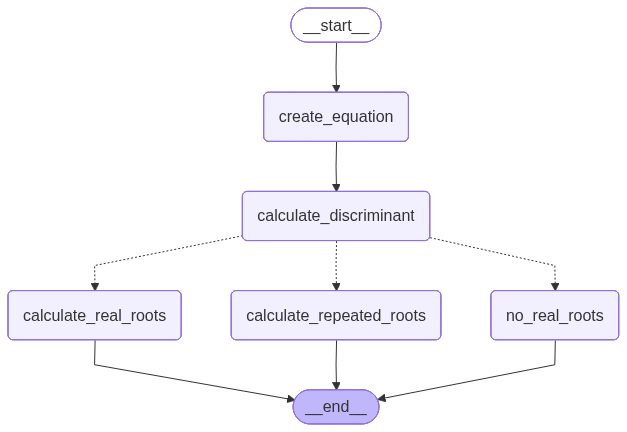

In [32]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [33]:
initial_state = {'a': 1, 'b': 2, 'c':1}

final_state = workflow.invoke(initial_state)


final_state

{'a': 1,
 'b': 2,
 'c': 1,
 'discriminant': 0,
 'equation': '1*x2 + 2*x + 1)',
 'result': 'The repeated root is -1.0'}